## Кейс «Прогнозирование конечных свойств новых материалов (композиционных материалов)»

### Импорт библиотек

In [51]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

import tensorflow as tf
from tensorflow.keras import layers
from keras.engine.sequential import Sequential


### Загрузка данных

In [2]:
x_bp = pd.read_excel('data/X_bp.xlsx', index_col =0)
x_bp.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0.0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2.0,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


In [3]:
x_bp.shape

(1023, 10)

In [4]:
x_nup = pd.read_excel('data/X_nup.xlsx', index_col = 0)
x_nup.head()


,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,0.0,4.0,57.0
1.0,0.0,4.0,60.0
2.0,0.0,4.0,70.0
3.0,0.0,5.0,47.0
4.0,0.0,5.0,57.0


In [5]:
x_nup.shape

(1040, 3)

Объединение таблиц

In [6]:
df = x_bp.join(x_nup, how = 'inner')
df.shape

(1023, 13)

### Изучение данных

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки

In [8]:
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [9]:
df.isna().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

### Визуализация данных

#### Гистограммы

In [10]:
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

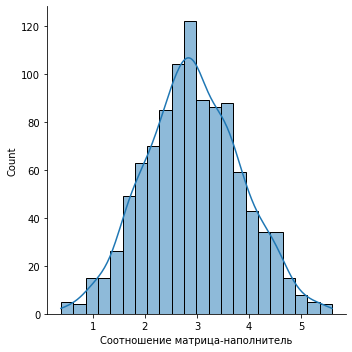

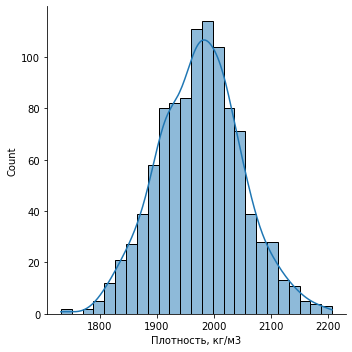

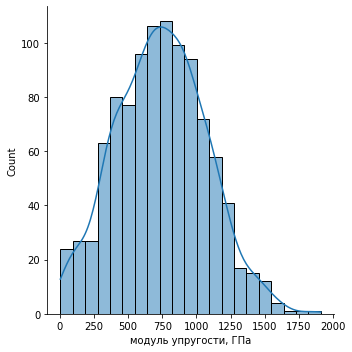

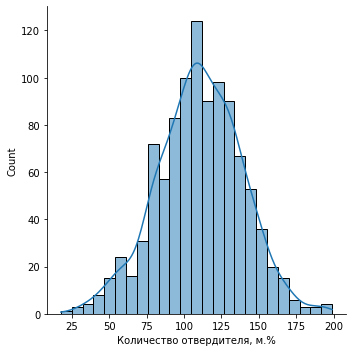

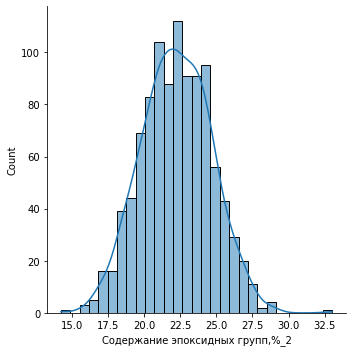

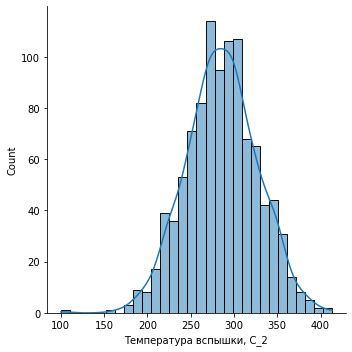

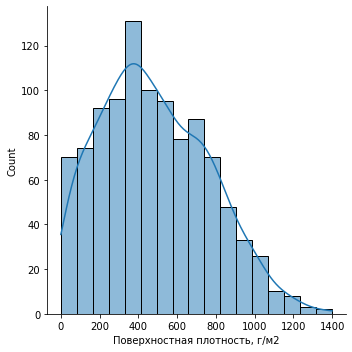

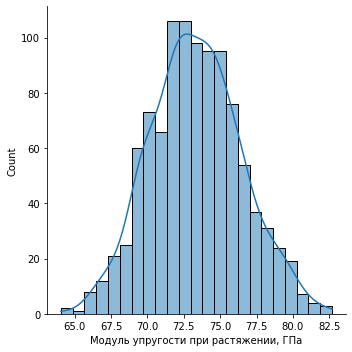

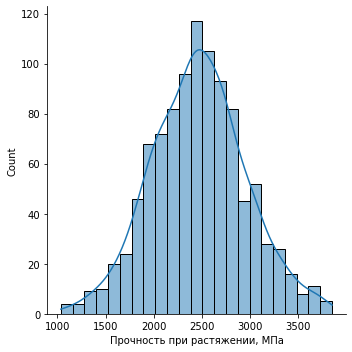

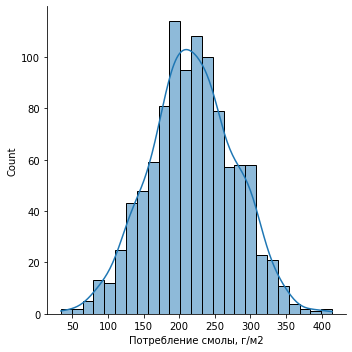

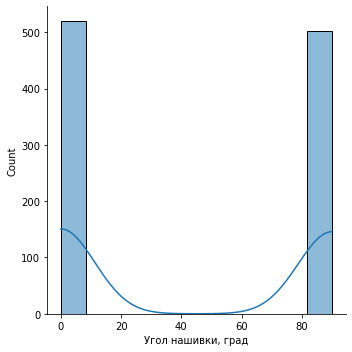

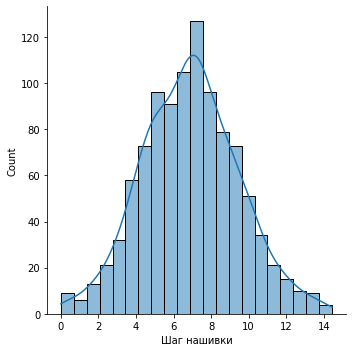

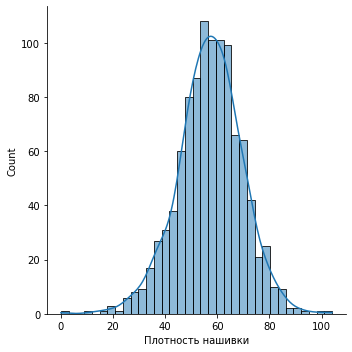

In [11]:
for name in df.columns:
    sns.displot(df[name], kde=True)


#### Матрица корреляции

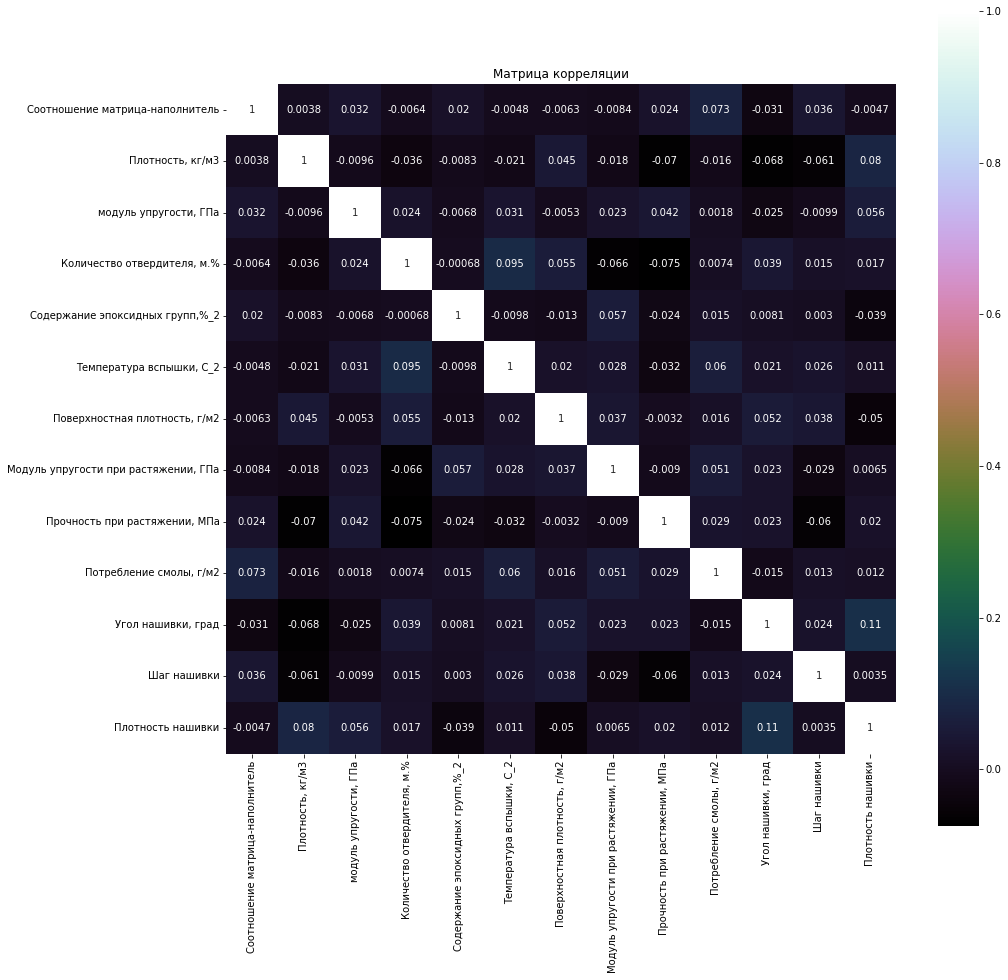

In [12]:
correlation = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Матрица корреляции')
plt.show()


In [13]:
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

### Кодировка признаков

In [14]:
labelencoder = LabelEncoder()
df['Угол нашивки, град'] = labelencoder.fit_transform(df['Угол нашивки, град'])
df.tail()


,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1018.0,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,1,9.076380,47.019770
1019.0,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,1,10.565614,53.750790
1020.0,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,1,4.161154,67.629684
1021.0,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,1,6.313201,58.261074
1022.0,3.808020,1890.413468,417.316232,129.183416,27.474763,300.952708,758.747882,74.309704,2856.328932,194.754342,1,6.078902,77.434468


### Нормализация

In [15]:
scaler = preprocessing.MinMaxScaler()
names = df.columns
df_norm =pd.DataFrame(scaler.fit_transform(df), columns=names) 
df_norm.tail()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1018,0.361750,0.462855,0.476884,0.382158,0.313057,0.717503,0.149109,0.485125,0.480312,0.239516,1.0,0.628535,0.452161
1019,0.587163,0.668737,0.231678,0.707685,0.285131,0.492271,0.250230,0.475992,0.470745,0.220404,1.0,0.731664,0.516890
1020,0.555750,0.505470,0.217065,0.512067,0.517605,0.473781,0.528643,0.573346,0.578340,0.532590,1.0,0.288158,0.650355
1021,0.637396,0.703842,0.387114,0.682389,0.266309,0.561107,0.458108,0.536217,0.368070,0.428909,1.0,0.437186,0.560262
1022,0.657131,0.333290,0.217317,0.614984,0.705242,0.641461,0.541942,0.550550,0.647135,0.422680,1.0,0.420961,0.744642


#### Гистограмма после нормализации

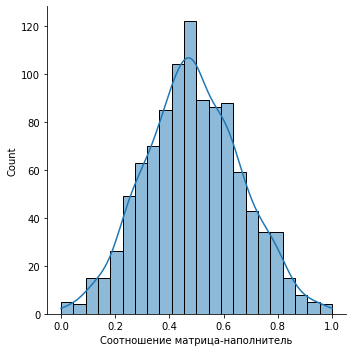

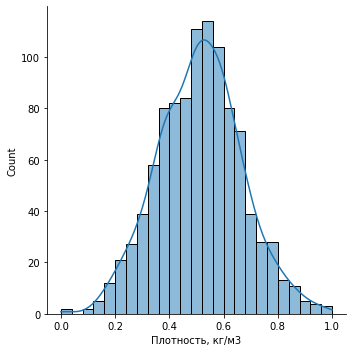

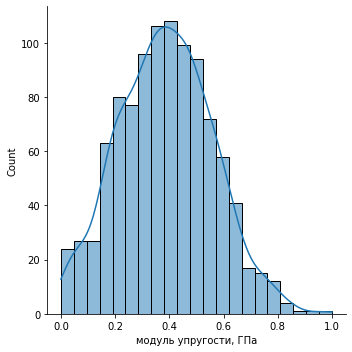

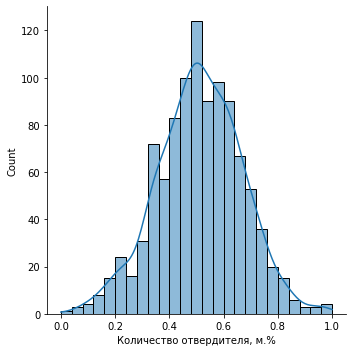

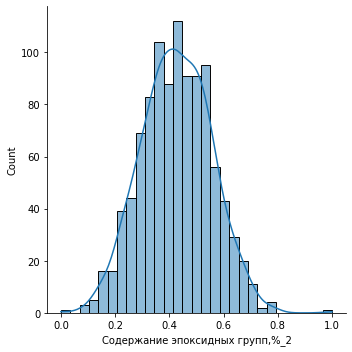

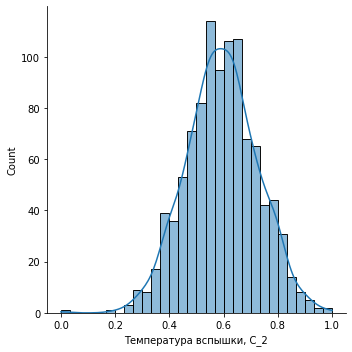

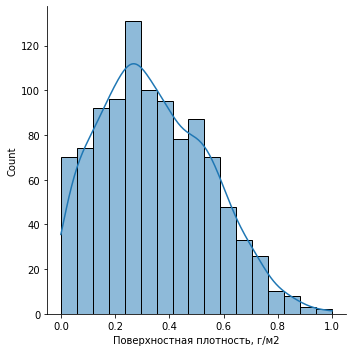

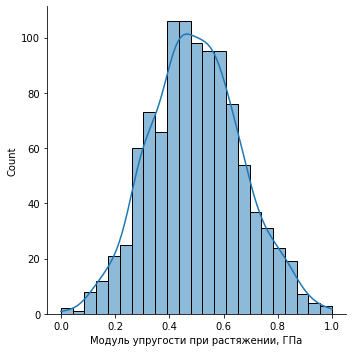

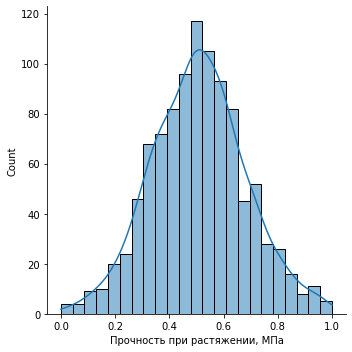

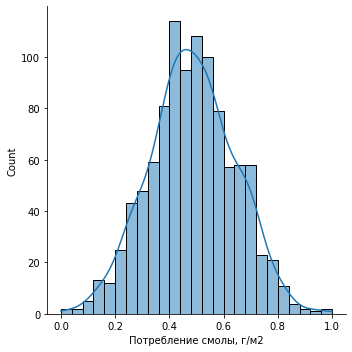

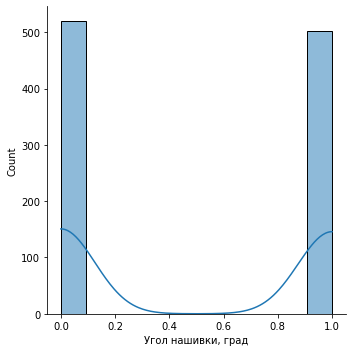

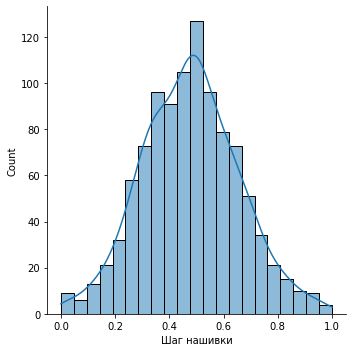

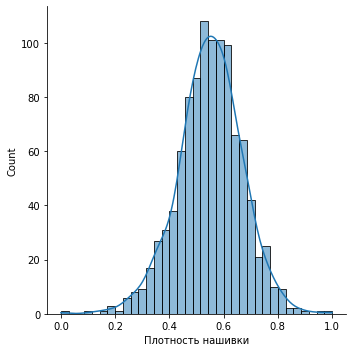

In [16]:
for name in df_norm.columns:
    sns.displot(df_norm[name], kde=True)

### Определение функции для визуализаци

In [17]:
def actual_and_predicted_plot(orig, predict, var, model_name): 
 plt.figure(figsize=(17,5))
 plt.title(f'Тестовые и прогнозные значения: {model_name}')
 plt.plot(orig, label='Тест')
 plt.plot(predict, label='Прогноз')
 plt.legend(loc='best')
 plt.ylabel(var)
 plt.show()

In [29]:
errors_df = pd.DataFrame(columns=['Целевой параметр','Метод','MSE','R2'])

### Разделение данных для создания модели

In [19]:
y_TMoE = df_norm['Модуль упругости при растяжении, ГПа']
y_TS = df_norm['Прочность при растяжении, МПа']
y_TMoE.shape

(1023,)

In [20]:
X_TMoE = df_norm.loc[:, df_norm.columns != 'Модуль упругости при растяжении, ГПа']
X_TS = df_norm.loc[:, df_norm.columns != 'Прочность при растяжении, МПа']
X_TMoE.shape

(1023, 12)

#### Разделение на обучающую и тестовую выборку

In [21]:
X_TMoE_train, X_TMoE_test, y_TMoE_train, y_TMoE_test = train_test_split(X_TMoE, y_TMoE, test_size = .3, random_state = 22)
X_TS_train, X_TS_test, y_TS_train, y_TS_test = train_test_split(X_TS, y_TS, test_size = .3, random_state = 22)

### Регрессия к-ближайших соседей

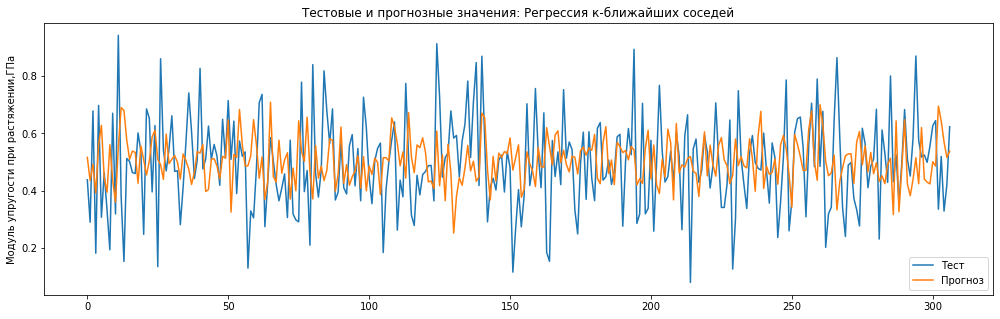

In [22]:
KNeighborsRegressorObj_TMoE = KNeighborsRegressor()
KNeighborsRegressorObj_TMoE.fit(X_TMoE_train,  y_TMoE_train)

MSE_TMoE = mean_squared_error(y_TMoE_test, 
KNeighborsRegressorObj_TMoE.predict(X_TMoE_test))
R2_TMoE = r2_score(y_TMoE_test, KNeighborsRegressorObj_TMoE.predict(X_TMoE_test))

actual_and_predicted_plot(y_TMoE_test.values, 
KNeighborsRegressorObj_TMoE.predict(X_TMoE_test), 'Модуль упругости при растяжении,ГПа', 'Регрессия к-ближайших соседей')



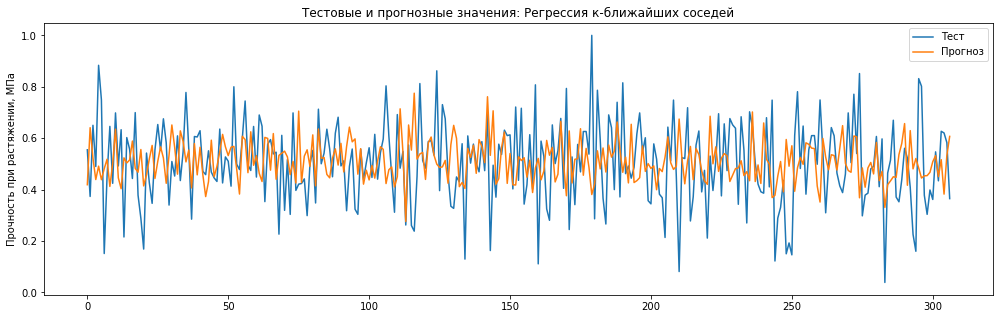

In [23]:
KNeighborsRegressorObj_TS = KNeighborsRegressor()
KNeighborsRegressorObj_TS.fit(X_TS_train,  y_TS_train)

MSE_TS = mean_squared_error(y_TS_test, 
KNeighborsRegressorObj_TS.predict(X_TS_test))
R2_TS = r2_score(y_TS_test, KNeighborsRegressorObj_TS.predict(X_TS_test))

actual_and_predicted_plot(y_TS_test.values, 
KNeighborsRegressorObj_TS.predict(X_TS_test), 'Прочность при растяжении, МПа', 'Регрессия к-ближайших соседей')



In [30]:
errors_df = pd.concat([errors_df, pd.DataFrame({'Метод':'Регрессия к-ближайших соседей',\
 'Целевой параметр':['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'],\
 'MSE':[MSE_TMoE, MSE_TS], 'R2':[R2_TMoE, R2_TS]})], ignore_index=True)
errors_df


,Целевой параметр,Метод,MSE,R2
0,"Модуль упругости при растяжении, ГПа",Регрессия к-ближайших соседей,0.031056,-0.220902
1,"Прочность при растяжении, МПа",Регрессия к-ближайших соседей,0.032229,-0.261319


## Регрессия случайного леса

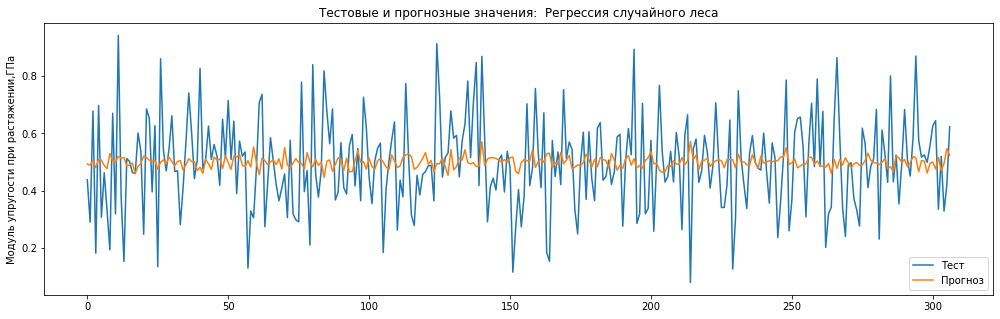

In [46]:
rfr_TMoE = RandomForestRegressor(n_estimators = 30, max_depth = 3, random_state = 20)
rfr_TMoE.fit(X_TMoE_train,  y_TMoE_train)
rfr_TMoE_predicted = rfr_TMoE.predict(X_TMoE_test)

MSE_TMoE2 = mean_squared_error(y_TMoE_test, rfr_TMoE_predicted)
R2_TMoE2 = r2_score(y_TMoE_test, rfr_TMoE_predicted)

actual_and_predicted_plot(y_TMoE_test.values, rfr_TMoE_predicted, 'Модуль упругости при растяжении,ГПа', ' Регрессия случайного леса')


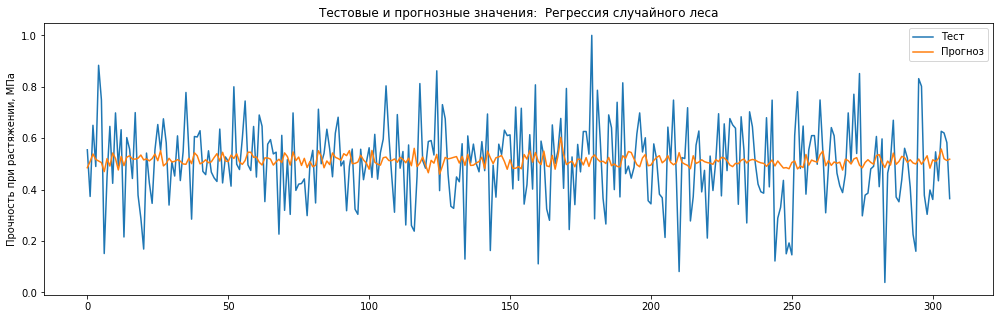

In [43]:
rfr_TS = RandomForestRegressor(n_estimators = 30, max_depth = 3, random_state = 20)
rfr_TS.fit(X_TS_train,  y_TS_train)
rfr_TS_predicted = rfr_TS.predict(X_TS_test)

MSE_TS2 = mean_squared_error(y_TS_test, rfr_TS_predicted)
R2_TS2 = r2_score(y_TS_test, rfr_TS_predicted)

actual_and_predicted_plot(y_TS_test.values, rfr_TS_predicted, 'Прочность при растяжении, МПа', ' Регрессия случайного леса')



In [47]:
errors_df = pd.concat([errors_df, pd.DataFrame({'Метод':'Регрессия случайного леса',\
 'Целевой параметр':['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'],\
 'MSE':[MSE_TMoE2, MSE_TS2], 'R2':[R2_TMoE2, R2_TS2]})], ignore_index=True)
errors_df

,Целевой параметр,Метод,MSE,R2
0,"Модуль упругости при растяжении, ГПа",Регрессия к-ближайших соседей,0.031056,-0.220902
1,"Прочность при растяжении, МПа",Регрессия к-ближайших соседей,0.032229,-0.261319
2,"Модуль упругости при растяжении, ГПа",Регрессия случайного леса,0.025804,-0.014451
3,"Прочность при растяжении, МПа",Регрессия случайного леса,0.025408,0.005636
4,"Модуль упругости при растяжении, ГПа",Регрессия случайного леса,0.025804,-0.014451
5,"Прочность при растяжении, МПа",Регрессия случайного леса,0.02528,0.010665
6,"Модуль упругости при растяжении, ГПа",Регрессия случайного леса,0.025804,-0.014451
7,"Прочность при растяжении, МПа",Регрессия случайного леса,0.025459,0.003659
8,"Модуль упругости при растяжении, ГПа",Регрессия случайного леса,0.025804,-0.014451
9,"Прочность при растяжении, МПа",Регрессия случайного леса,0.025408,0.005636


## Нейросеть

In [68]:
model_TMoE = Sequential()
model_TMoE.add(layers.Dense(128, activation='relu'))
model_TMoE.add(layers.Dense(64, activation = 'relu'))
model_TMoE.add(layers.Dense(32, activation = 'relu'))
model_TMoE.add(layers.Dense(16, activation = 'relu'))
model_TMoE.add(layers.Dense(8, activation = 'relu'))
model_TMoE.add(layers.Dense(1, activation = 'relu'))

model_TMoE.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


In [69]:
model_TMoE.fit(X_TMoE_train,  y_TMoE_train, epochs = 10, validation_split = 0.2)
NN_TMoE_predicted = model_TMoE.predict(X_TMoE_test)

Epoch 1/10
18/18 [==============================] - 2s 15ms/step - loss: 0.0899 - accuracy: 0.0017 - val_loss: 0.0354 - val_accuracy: 0.0000e+00
Epoch 2/10
18/18 [==============================] - 0s 4ms/step - loss: 0.0336 - accuracy: 0.0017 - val_loss: 0.0324 - val_accuracy: 0.0000e+00
Epoch 3/10
18/18 [==============================] - 0s 4ms/step - loss: 0.0305 - accuracy: 0.0000e+00 - val_loss: 0.0345 - val_accuracy: 0.0000e+00
Epoch 4/10
18/18 [==============================] - 0s 4ms/step - loss: 0.0294 - accuracy: 0.0017 - val_loss: 0.0344 - val_accuracy: 0.0000e+00
Epoch 5/10
18/18 [==============================] - 0s 4ms/step - loss: 0.0294 - accuracy: 0.0035 - val_loss: 0.0345 - val_accuracy: 0.0000e+00
Epoch 6/10
18/18 [==============================] - 0s 4ms/step - loss: 0.0289 - accuracy: 0.0017 - val_loss: 0.0339 - val_accuracy: 0.0000e+00
Epoch 7/10
18/18 [==============================] - 0s 4ms/step - loss: 0.0289 - accuracy: 0.0035 - val_loss: 0.0331 - val_accuracy

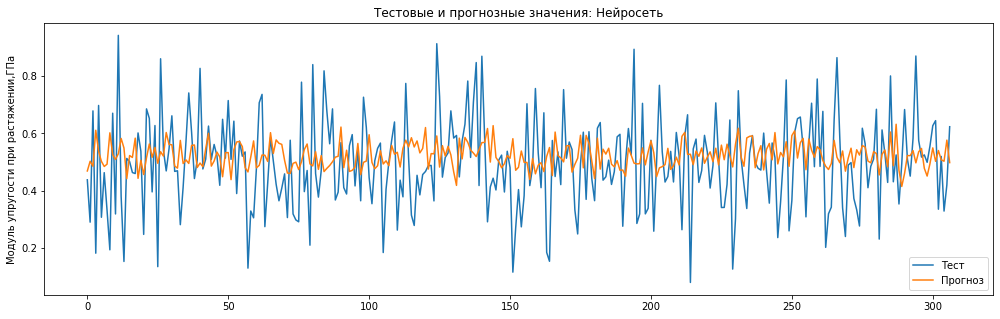

In [71]:
MSE_TMoE3 = mean_squared_error(y_TMoE_test, NN_TMoE_predicted)
R2_TMoE3 = r2_score(y_TMoE_test, NN_TMoE_predicted)

actual_and_predicted_plot(y_TMoE_test.values, NN_TMoE_predicted, 'Модуль упругости при растяжении,ГПа', 'Нейросеть')


In [72]:
model_TS = Sequential()
model_TS.add(layers.Dense(128, activation='relu'))
model_TS.add(layers.Dense(64, activation = 'relu'))
model_TS.add(layers.Dense(32, activation = 'relu'))
model_TS.add(layers.Dense(16, activation = 'relu'))
model_TS.add(layers.Dense(8, activation = 'relu'))
model_TS.add(layers.Dense(1, activation = 'relu'))

model_TS.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


In [73]:
model_TS.fit(X_TS_train,  y_TS_train, epochs = 10, validation_split = 0.2)
NN_TS_predicted = model_TS.predict(X_TS_test)

Epoch 1/10
18/18 [==============================] - 2s 16ms/step - loss: 0.0688 - accuracy: 0.0017 - val_loss: 0.0356 - val_accuracy: 0.0000e+00
Epoch 2/10
18/18 [==============================] - 0s 4ms/step - loss: 0.0368 - accuracy: 0.0017 - val_loss: 0.0333 - val_accuracy: 0.0000e+00
Epoch 3/10
18/18 [==============================] - 0s 4ms/step - loss: 0.0343 - accuracy: 0.0017 - val_loss: 0.0357 - val_accuracy: 0.0000e+00
Epoch 4/10
18/18 [==============================] - 0s 4ms/step - loss: 0.0333 - accuracy: 0.0017 - val_loss: 0.0348 - val_accuracy: 0.0000e+00
Epoch 5/10
18/18 [==============================] - 0s 4ms/step - loss: 0.0330 - accuracy: 0.0017 - val_loss: 0.0368 - val_accuracy: 0.0000e+00
Epoch 6/10
18/18 [==============================] - 0s 4ms/step - loss: 0.0325 - accuracy: 0.0017 - val_loss: 0.0326 - val_accuracy: 0.0000e+00
Epoch 7/10
18/18 [==============================] - 0s 4ms/step - loss: 0.0323 - accuracy: 0.0017 - val_loss: 0.0361 - val_accuracy: 0.

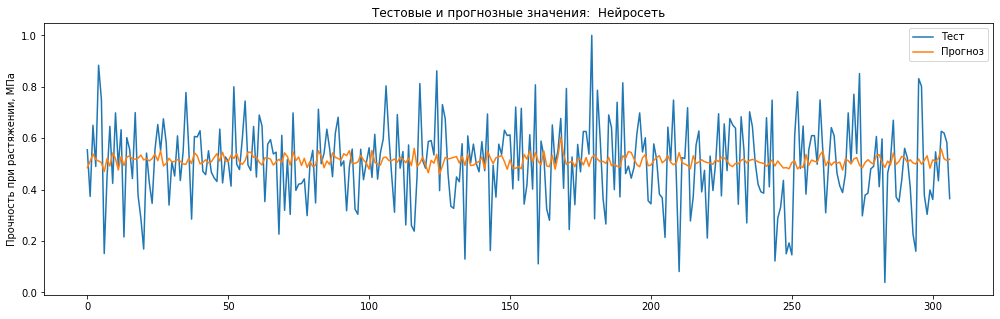

In [74]:
MSE_TS3 = mean_squared_error(y_TS_test, rfr_TS_predicted)
R2_TS3 = r2_score(y_TS_test, rfr_TS_predicted)

actual_and_predicted_plot(y_TS_test.values, rfr_TS_predicted, 'Прочность при растяжении, МПа', ' Нейросеть')



In [75]:
errors_df = pd.concat([errors_df, pd.DataFrame({'Метод':'Нейросеть',\
 'Целевой параметр':['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'],\
 'MSE':[MSE_TMoE3, MSE_TS3], 'R2':[R2_TMoE3, R2_TS3]})], ignore_index=True)
errors_df

,Целевой параметр,Метод,MSE,R2
0,"Модуль упругости при растяжении, ГПа",Регрессия к-ближайших соседей,0.031056,-0.220902
1,"Прочность при растяжении, МПа",Регрессия к-ближайших соседей,0.032229,-0.261319
2,"Модуль упругости при растяжении, ГПа",Регрессия случайного леса,0.025804,-0.014451
3,"Прочность при растяжении, МПа",Регрессия случайного леса,0.025408,0.005636
4,"Модуль упругости при растяжении, ГПа",Регрессия случайного леса,0.025804,-0.014451
5,"Прочность при растяжении, МПа",Регрессия случайного леса,0.02528,0.010665
6,"Модуль упругости при растяжении, ГПа",Регрессия случайного леса,0.025804,-0.014451
7,"Прочность при растяжении, МПа",Регрессия случайного леса,0.025459,0.003659
8,"Модуль упругости при растяжении, ГПа",Регрессия случайного леса,0.025804,-0.014451
9,"Прочность при растяжении, МПа",Регрессия случайного леса,0.025408,0.005636
